In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [3]:


# Load the data
data = pd.read_csv('sensor_data.csv')

# Fill missing values
data.fillna(method='ffill', inplace=True)

# Select relevant columns for analysis
features = ['Time','Pressure','Temperature', 'Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz']
data_features = data[features]

# Normalize the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_features)


/var/folders/4m/vzz0jx3j2t32z4s15p86bn400000gn/T/ipykernel_29043/971309041.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [6]:
data.head()

,Time,Pressure,Temperature,Ax,Ay,Az,Gx,Gy,Gz
0,416.117,100189.4,29.17,-0.53,-0.07,1.12,58.27,-36.76,-73.00
1,416.633,100190.3,29.19,-0.07,-0.06,1.41,7.42,-6.00,-30.05
2,417.147,100192.6,29.20,-0.23,-0.04,1.35,-118.89,86.21,223.91
3,417.662,100190.3,29.17,-0.38,-0.59,1.21,118.89,16.73,-166.84
4,418.177,100189.8,29.14,-0.16,0.08,1.43,-21.25,61.73,223.57


In [7]:
from sklearn.ensemble import IsolationForest

In [8]:
# Initialize the model
model = IsolationForest(contamination=0.01, random_state=42)

# Train the model
model.fit(data_normalized)

IsolationForest(contamination=0.01, random_state=42)

In [10]:
import time

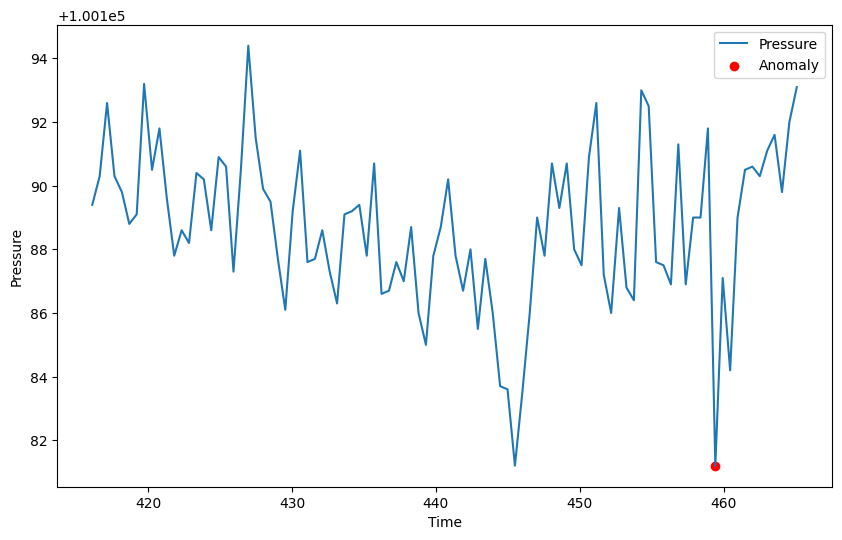

In [15]:
# Predict anomalies
data['anomaly'] = model.predict(data_normalized)

# -1 indicates an anomaly, 1 indicates normal
data['anomaly'] = data['anomaly'].apply(lambda x: 1 if x == -1 else 0)

# Visualize the anomalies
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['Pressure'], label='Pressure')
plt.scatter(data['Time'][data['anomaly'] == 1], data['Pressure'][data['anomaly'] == 1], color='red', label='Anomaly')
plt.xlabel('Time')
plt.ylabel('Pressure')
plt.legend()
plt.show()


In [17]:
# Assuming we have a labeled dataset for evaluation
true_labels = data['anomaly']  # 1 for actual anomalies, 0 for normal

from sklearn.metrics import classification_report

print(classification_report(true_labels, data['anomaly']))

# In a real-time scenario, the model would continuously process incoming data


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00         1

    accuracy                           1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96



In [19]:
data.anomaly

0     0
1     0
2     0
3     0
4     0
     ..
91    0
92    0
93    0
94    0
95    0
Name: anomaly, Length: 96, dtype: int64

In [20]:
import numpy as np

def detect_anomaly_live(sensor_data):
    # Preprocess the live sensor data
    sensor_data_normalized = scaler.transform(sensor_data)
    
    # Predict anomalies
    anomalies = model.predict(sensor_data_normalized)
    
    # Convert predictions to binary (1 for anomaly, 0 for normal)
    anomalies = np.array([1 if x == -1 else 0 for x in anomalies])
    
    return anomalies

# Example live data
live_data = np.array([[1013, 0.01, 0.02, 0.98, 0.001, 0.002, 0.003]])

# Detect anomalies in live data
anomalies_detected = detect_anomaly_live(live_data)
print(anomalies_detected)


/Users/jebastin/anaconda3/envs/gpr/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 7 features, but StandardScaler is expecting 9 features as input.

In [ ]:
import time

def continuous_monitoring(interval=60):
    while True:
        # Collect new data (this should be replaced with actual data collection logic)
        new_data = collect_sensor_data()
        
        # Detect anomalies
        anomalies = detect_anomaly_live(new_data)
        
        # Take action if anomalies are detected
        if np.any(anomalies):
            print("Anomaly detected! Taking preventive measures.")
        
        # Wait for the next interval
        time.sleep(interval)

# Example function to simulate data collection
def collect_sensor_data():
    # Simulate collecting a single row of sensor data
    return np.array([[1013, 0.01, 0.02, 0.98, 0.001, 0.002, 0.003]])

# Start continuous monitoring
continuous_monitoring()
